In [7]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
!nvidia-smi

Sat Dec 14 17:23:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.80                 Driver Version: 546.80       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P3              15W /  35W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# installing package to work with yolov8
!pip install ultralytics


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from IPython import display
display.clear_output()

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [10]:
def load_dataset(root_dir):
    train_dir = os.path.join(root_dir, 'train')
    valid_dir = os.path.join(root_dir, 'val')

    # Load training data
    train_images, train_annotations = load_data(train_dir)

    # Load validation data
    valid_images, valid_annotations = load_data(valid_dir)

    return train_images, train_annotations, valid_images, valid_annotations

In [12]:
def load_data(data_dir):
    image_paths = []
    annotation_paths = []

    # Collect image and annotation file paths
    for filename in os.listdir(data_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_paths.append(os.path.join(data_dir, filename))
            annotation_paths.append(os.path.join(data_dir, filename.replace('.jpg', '.txt').replace('.png', '.txt')))

    # Load images
    images = [cv2.imread(img_path) for img_path in image_paths]

    # Load annotations
    annotations = [load_annotations(ann_path) for ann_path in annotation_paths]

    return images, annotations

In [13]:
def load_annotations(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        # Assuming YOLO format: class, x_center, y_center, width, height
        annotations = [list(map(float, line.strip().split())) for line in lines]

    return np.array(annotations)


root_directory = ''
train_images, train_annotations, valid_images, valid_annotations = load_dataset(root_directory)

In [13]:
train_directory = './train'
files_in_directory = os.listdir(train_directory)
print(files_in_directory)

['images', 'label']


In [14]:
valid_directory = './val'
files_in_directory = os.listdir(valid_directory)
print(files_in_directory)

['images', 'label']


In [22]:
def load_sample_data(data_dir):
    image_dir = os.path.join(data_dir, 'images')
    label_dir = os.path.join(data_dir, 'label')

    image_paths, label_paths = [], []

    # Collect image and label file paths
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg'):
            image_paths.append(os.path.join(image_dir, filename))
            label_paths.append(os.path.join(label_dir, filename.replace('.jpg', '.txt')))

    return image_paths, label_paths

In [23]:
def load_annotations(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        # Assuming YOLO format: class, x_center, y_center, width, height
        annotations = [list(map(float, line.strip().split())) for line in lines]

    return annotations

image_paths, annotation_paths = load_sample_data(train_directory)

In [24]:
def count_files(directory):
    image_dir = os.path.join(directory, 'images')
    label_dir = os.path.join(directory, 'label')

    image_count = len([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
    label_count = len([f for f in os.listdir(label_dir) if f.endswith('.txt')])

    return image_count, label_count

image_count, label_count = count_files(train_directory)

print(f"Number of images in the training set: {image_count}")
print(f"Number of labels in the training set: {label_count}")

Number of images in the training set: 864
Number of labels in the training set: 1466


In [25]:
# Print labels for the first 10 samples
for i in range(min(10, len(annotation_paths))):
    sample_annotations = load_annotations(annotation_paths[i])
    print(f"Labels for {annotation_paths[i]}:")
    print(sample_annotations)
    print("------------------------")

Labels for ./train\label\(1).txt:
[[3.0, 0.386153, 0.702703, 0.428989, 0.253071]]
------------------------
Labels for ./train\label\(2).txt:
[[3.0, 0.28125, 0.10874, 0.176136, 0.173597], [3.0, 0.737825, 0.150804, 0.196429, 0.158908], [3.0, 0.602273, 0.801123, 0.061688, 0.102823], [3.0, 0.674919, 0.754386, 0.049513, 0.09214], [3.0, 0.26461, 0.847193, 0.224026, 0.130865]]
------------------------
Labels for ./train\label\(3).txt:
[[3.0, 0.308763, 0.14742, 0.274365, 0.213759], [3.0, 0.695741, 0.156634, 0.242424, 0.173219], [3.0, 0.565111, 0.908477, 0.141687, 0.111794], [3.0, 0.349713, 0.902948, 0.110565, 0.113022]]
------------------------
Labels for ./train\label\(4).txt:
[[3.0, 0.529484, 0.862408, 0.610975, 0.203931], [3.0, 0.495495, 0.277027, 0.058149, 0.097052], [3.0, 0.347666, 0.264742, 0.070434, 0.089681]]
------------------------
Labels for ./train\label\(5).txt:
[[3.0, 0.466011, 0.255528, 0.113841, 0.125307], [3.0, 0.622031, 0.283784, 0.127764, 0.142506], [3.0, 0.7457, 0.288698, 0

In [14]:
image_paths, annotation_paths = load_sample_data(valid_directory)


for i in range(min(10, len(annotation_paths))):
    try:
        sample_annotations = load_annotations(annotation_paths[i])
        print(f"Labels for {annotation_paths[i]}:")
        print(sample_annotations)
    except:
        pass
    print("------------------------")

NameError: name 'load_sample_data' is not defined

In [28]:
def load_sample_data(data_dir):
    image_dir = os.path.join(data_dir, 'images')
    label_dir = os.path.join(data_dir, 'label')

    image_paths, label_paths = [], []

    # Collect image and label file paths
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg'):
            image_paths.append(os.path.join(image_dir, filename))
            label_paths.append(os.path.join(label_dir, filename.replace('.jpg', '.txt')))

    return image_paths, label_paths

def load_annotations(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        # Assuming YOLO format: class, x_center, y_center, width, height
        annotations = [list(map(float, line.strip().split())) for line in lines]

    return annotations

In [29]:
def display_sample(image_path, annotations):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for annotation in annotations:
        class_label, x_center, y_center, width, height = annotation
        x, y, w, h = x_center, y_center, width, height

        # Convert YOLO coordinates to bounding box coordinates
        x *= image.shape[1]
        y *= image.shape[0]
        w *= image.shape[1]
        h *= image.shape[0]

        # Calculate top-left corner coordinates
        x -= w / 2
        y -= h / 2

        # Create a rectangle patch
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Display class label
        plt.text(x, y, f'{int(class_label)}', color='r')

    plt.show()


image_paths, annotation_paths = load_sample_data(train_directory)

In [15]:
# Display and plot annotations for the first 10 images
for i in range(min(10, len(image_paths))):
    sample_image_path = image_paths[i]
    sample_annotations = load_annotations(annotation_paths[i])
    display_sample(sample_image_path, sample_annotations)
    print(f"Annotations plotted for {sample_image_path}")

NameError: name 'image_paths' is not defined

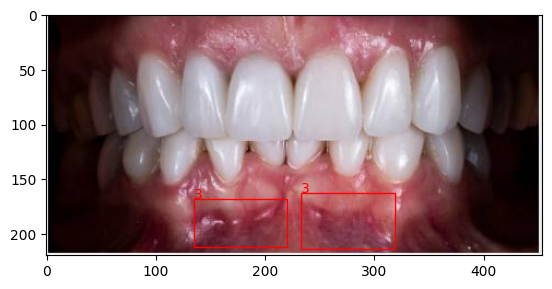

Annotations plotted for ./val\images\(225).jpg


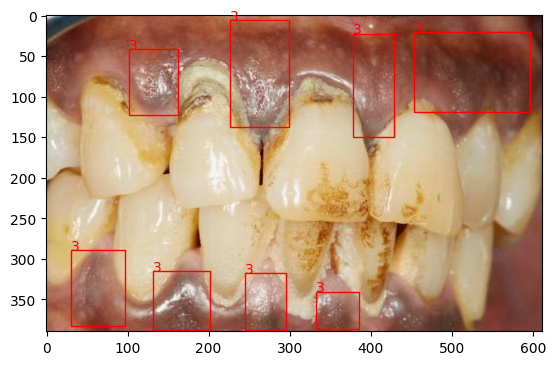

Annotations plotted for ./val\images\(226).jpg


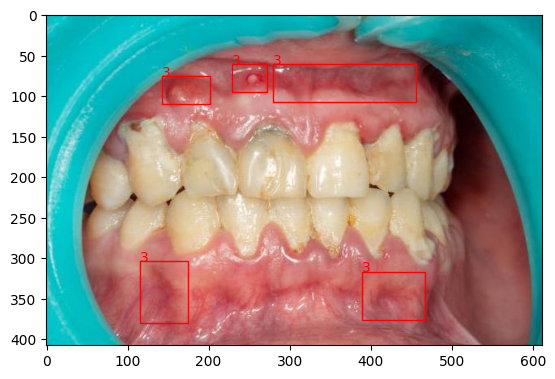

Annotations plotted for ./val\images\(227).jpg
Annotations plotted for ./val\images\(228).jpg


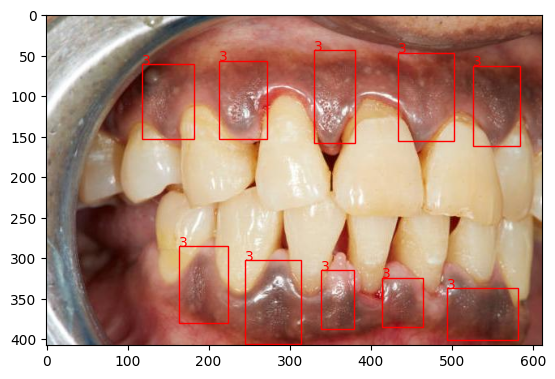

Annotations plotted for ./val\images\(229).jpg
Annotations plotted for ./val\images\(230).jpg


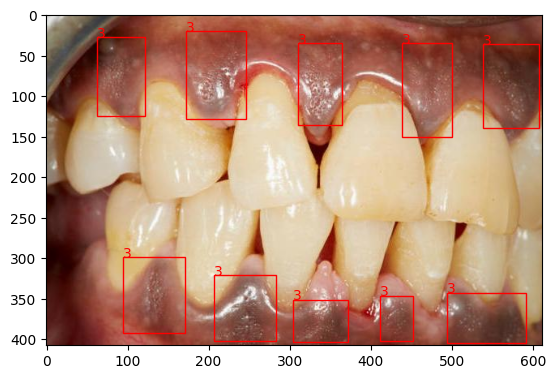

Annotations plotted for ./val\images\(231).jpg


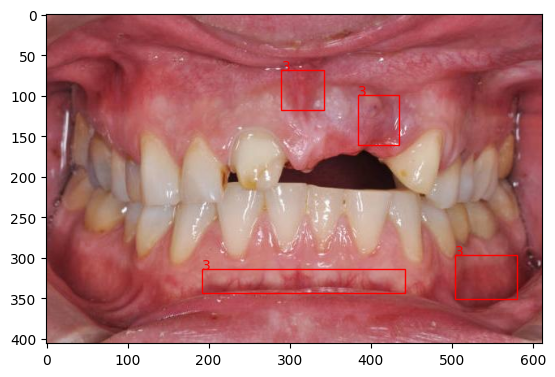

Annotations plotted for ./val\images\(232).jpg


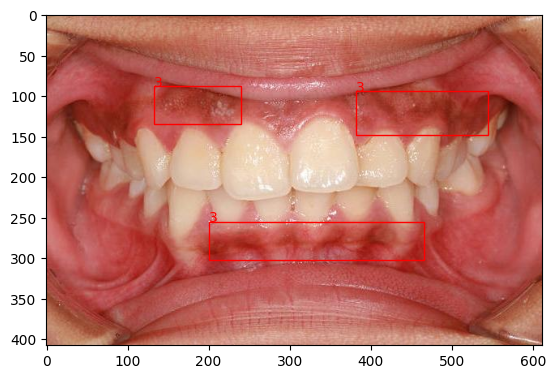

Annotations plotted for ./val\images\(233).jpg


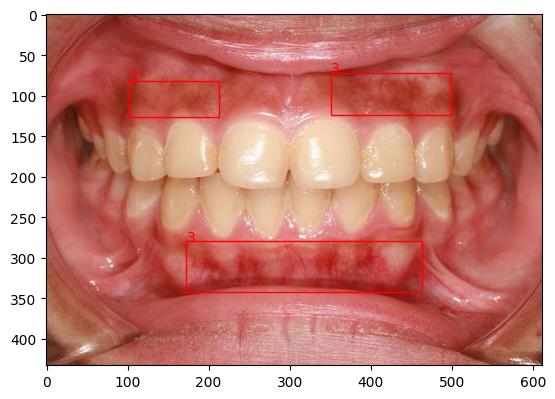

Annotations plotted for ./val\images\(234).jpg


In [32]:
image_paths, annotation_paths = load_sample_data(valid_directory)

# Display and plot annotations for the first 10 images
for i in range(min(10, len(image_paths))):
    try:
        sample_image_path = image_paths[i]
        sample_annotations = load_annotations(annotation_paths[i])
        display_sample(sample_image_path, sample_annotations)
    except:
        pass
    print(f"Annotations plotted for {sample_image_path}")

In [16]:
["Caries", "Ulcer", "Tooth Discoloration", "Gingivitis"]

['Caries', 'Ulcer', 'Tooth Discoloration', 'Gingivitis']